## 4.3 Boston Housing Price dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
# tf.autograph.experimental.do_not_convert

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [7]:
df = pd.read_csv('Boston.csv')
df[:5]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
df.shape

(506, 14)

### Random Forest as baseline model

In [9]:
y = df.medv
X = df.drop('medv',axis=1)

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.5,
                                                 random_state=0)

In [11]:
bag100 = RandomForestRegressor(max_features=13,
                              max_depth=4,
                              n_estimators=100,
                              random_state=1)
bag100.fit(X_train,y_train);

In [12]:
prediction = bag100.predict(X_test)
mean_squared_error(y_test,prediction)

17.860996301609262

In [13]:
 def mean_absolute_error(y,y_pred):
    y = np.array(y)
    y_pred = np.array(y_pred)
    return np.mean(np.abs((y-y_pred)))

In [14]:
mean_absolute_error(y_test,prediction)

2.6891055162691995

### Get dataset from keras

In [15]:
from tensorflow.keras.datasets import boston_housing

In [16]:
(train_data, train_targets),\
  (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [17]:
print(train_data.shape,train_targets.shape)

(404, 13) (404,)


In [18]:
print(test_data.shape,test_targets.shape)

(102, 13) (102,)


### Standardize the data for DL model

In [19]:
mean = train_data.mean(axis=0)
train_data -= mean
test_data -= mean

In [20]:
std = train_data.std(axis=0)
train_data /= std
test_data /= std

### Model definition

In [21]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", 
                  loss="mse", 
                  metrics=["mae"])
    return model

### Hold-out cross validation

In [22]:
n_epochs = 100

In [23]:
model = build_model()

In [24]:
history = model.fit(train_data, train_targets,
          epochs= n_epochs, batch_size=16,verbose=0,
                   validation_split = 0.20)

In [25]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

### Plot MAE

In [26]:
loss = history.history['mae']
val_loss = history.history['val_mae']

In [27]:
epochs = range(1,n_epochs+1)

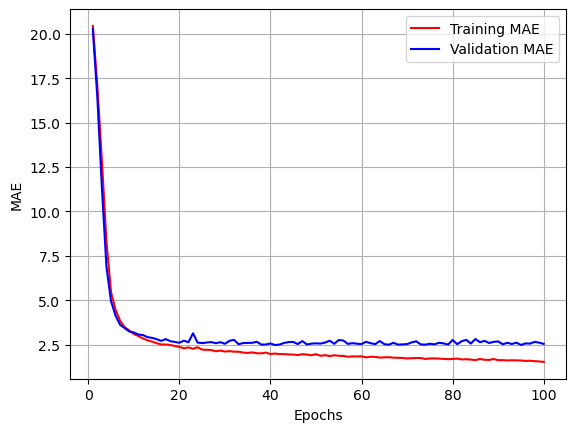

In [30]:
plt.figure() 
plt.plot(epochs, loss, "r", label="Training MAE") 
plt.plot(epochs, val_loss, "b",label="Validation MAE") 
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.grid()
#plt.xlim(1,n_epochs+1)
#plt.ylim(0,5)

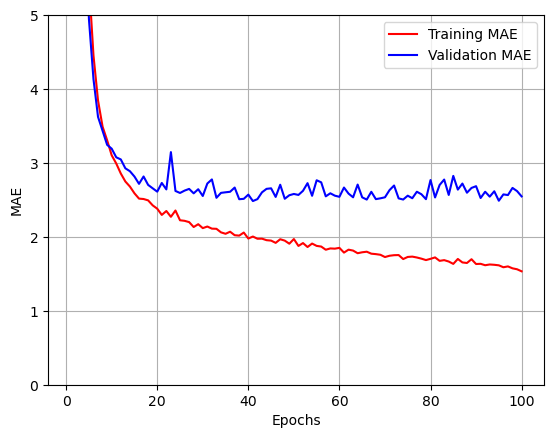

In [32]:
plt.figure() 
plt.plot(epochs, loss, "r", label="Training MAE") 
plt.plot(epochs, val_loss, "b",label="Validation MAE") 
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.grid()
#plt.xlim(1,n_epochs+1)
plt.ylim(0,5);

### Plot Loss

In [33]:
loss = history.history['loss']
val_loss = history.history['val_loss']

In [34]:
epochs = range(1,n_epochs+1)

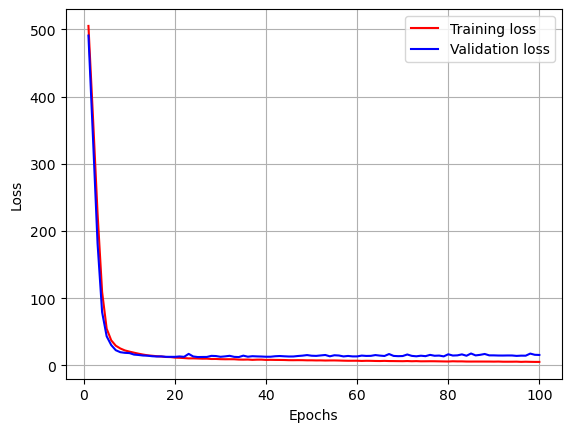

In [38]:
plt.figure() 
plt.plot(epochs, loss, "r", label="Training loss") 
plt.plot(epochs, val_loss, "b",label="Validation loss") 
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
# plt.xlim(5,n_epochs+1)
#plt.ylim(0,50);

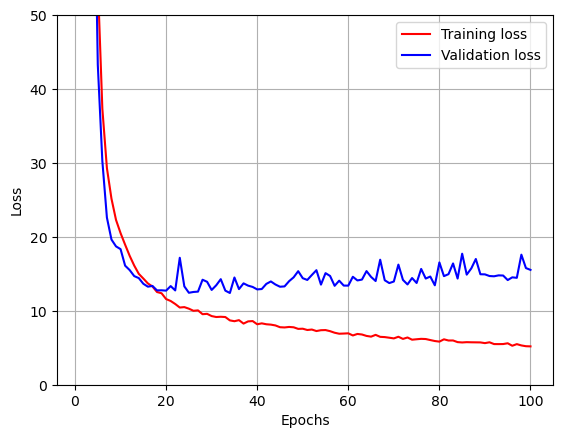

In [39]:
plt.figure() 
plt.plot(epochs, loss, "r", label="Training loss") 
plt.plot(epochs, val_loss, "b",label="Validation loss") 
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
# plt.xlim(5,n_epochs+1)
plt.ylim(0,50);

In [40]:
test_mse, test_mae = model.evaluate(test_data, 
                                    test_targets)

4/4 [==============================] - 0s 716us/step - loss: 24.7183 - mae: 3.1118


In [41]:
test_mse

24.718345642089844

In [42]:
test_mae

3.1118342876434326

In [43]:
mean_absolute_error(y_test,prediction)

2.6891055162691995

### K-fold cross validation

In [16]:
# Use // for floor division

In [44]:
25.5/4

6.375

In [45]:
25.5//4

6.0

In [46]:
len(train_data)

404

In [47]:
# number of folds
k = 4

In [48]:
# I call n the number of validation samples (num_val_samples)
n = 404 // 4
n

101

In [49]:
num_epochs = 100

In [50]:
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    
    # select the ith validation set
    val_data = train_data[i * n: (i + 1) * n]
    val_targets = train_targets[i * n: (i + 1) * n]
    
    # create ith train set
    partial_train_data = np.concatenate([train_data[:i * n],
                                         train_data[(i + 1) * n:]],
                                        axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * n],
                                            train_targets[(i + 1) * n:]],
                                           axis=0)
    
    # build model
    model = build_model()
    
    # train ith fold
    model.fit(partial_train_data, partial_train_targets,
              epochs=100, batch_size=16, verbose=0)
    
    # test ith validation fold
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [51]:
# see all k=4 validation scores
all_scores

[2.2244606018066406,
 2.5251636505126953,
 2.4839084148406982,
 2.3667287826538086]

In [52]:
np.mean(all_scores)

2.4000653624534607

In [83]:
# on avg. predicted prices are off by ___ USD

### Store the validation scores at each fold

In [53]:
num_epochs = 500

In [54]:
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    
    val_data = train_data[i * n: (i + 1) * n]
    val_targets = train_targets[i * n: (i + 1) * n]
    
    partial_train_data = np.concatenate([train_data[:i * n],
                                         train_data[(i + 1) * n:]],
                                        axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * n],
                                            train_targets[(i + 1) * n:]],
                                           axis=0)    
    model = build_model()
    
    # fit model with the ith train fold, and test on the ith validation fold
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=500, batch_size=16, verbose=0)
    
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [55]:
len(all_mae_histories)

4

In [56]:
len(all_mae_histories[0])

500

**Building the history of successive mean K-fold validation scores**

In [57]:
average_mae_history =\
[np.mean([x[i] for x in all_mae_histories]) for i in range(500)]

In [58]:
average_mae_history[:5]

[19.738460063934326,
 16.453338384628296,
 12.308206796646118,
 8.296262621879578,
 5.979350566864014]

**Now using pandas**

In [59]:
aux = np.vstack(all_mae_histories).T
aux.shape

(500, 4)

In [60]:
aux[:5]

array([[19.14192772, 19.17089844, 18.76852036, 21.87249374],
       [15.88905621, 15.94665146, 15.5572834 , 18.42036247],
       [11.94970417, 11.93095875, 11.7435112 , 13.60865307],
       [ 8.02670383,  7.83740187,  8.4090662 ,  8.91187859],
       [ 5.35522079,  5.59175348,  6.34962368,  6.62080431]])

In [63]:
# rows are epochs, columns are the folds

In [64]:
df2 = pd.DataFrame(aux,columns = ['fold1','fold2',
                                  'fold3','fold4'])
df2[:5]

,fold1,fold2,fold3,fold4
0,19.141928,19.170898,18.768520,21.872494
1,15.889056,15.946651,15.557283,18.420362
2,11.949704,11.930959,11.743511,13.608653
3,8.026704,7.837402,8.409066,8.911879
4,5.355221,5.591753,6.349624,6.620804


In [65]:
# find average MAE per epoch (i.e. per row)

In [66]:
df3 = df2.copy()
df3['average'] = df3.mean(axis=1)
df3[:5]

,fold1,fold2,fold3,fold4,average
0,19.141928,19.170898,18.768520,21.872494,19.738460
1,15.889056,15.946651,15.557283,18.420362,16.453338
2,11.949704,11.930959,11.743511,13.608653,12.308207
3,8.026704,7.837402,8.409066,8.911879,8.296263
4,5.355221,5.591753,6.349624,6.620804,5.979351


In [67]:
# plot column average

### Plotting validation scores

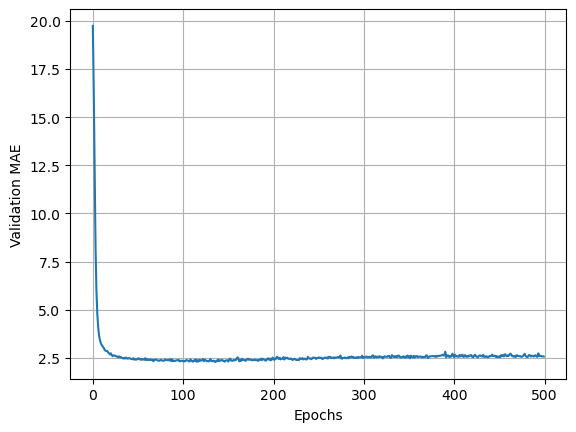

In [68]:
#plt.figure()
#plt.plot(range(1,501), average_mae_history)
df3.average.plot()
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.grid()

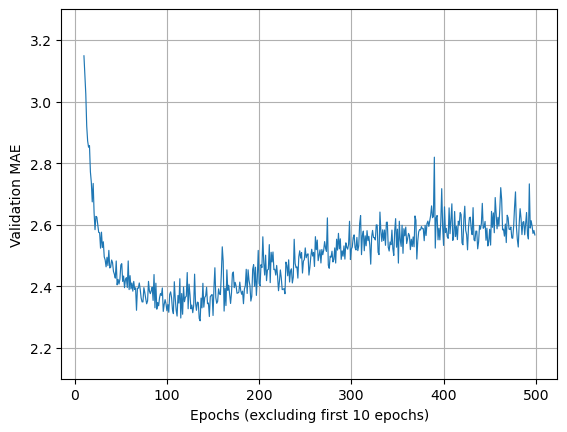

In [90]:
# lets omit first 10 epochs

df3.average.iloc[10:].plot(lw=0.85)
plt.xlabel("Epochs (excluding first 10 epochs)")
plt.ylabel("Validation MAE")
plt.ylim(2.1,3.3)
plt.grid()

In [91]:
# Validation MAE stops decreasing around 130 epochs

### Train the final model on all the train data

In [93]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0);

In [94]:
test_mse_score, test_mae_score =\
model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 835us/step - loss: 13.4597 - mae: 2.4644


In [95]:
test_mae_score

2.4643611907958984

In [96]:
# on avg. predicted prices are off by ____ USD

### Generating predictions on test dataset

In [97]:
predictions = model.predict(test_data)

4/4 [==============================] - 0s 596us/step


In [98]:
predictions[:15]

array([[ 8.483338],
       [17.381884],
       [21.670645],
       [34.4492  ],
       [25.332567],
       [22.485651],
       [28.129332],
       [21.861189],
       [18.706568],
       [20.26549 ],
       [18.867323],
       [16.730606],
       [14.984625],
       [43.50325 ],
       [20.088987]], dtype=float32)

In [99]:
# The 1st house in test set is predicted to have a price around $8480